Vamos a realizar un análisis exploratorio de datos de los siguientes datasets: 'Coursera_courses.csv', 'Coursera_reviews.csv', 'edx_courses.csv' y 'udemy_courses.csv' los cuales contienen información sobre plataformas de cursos onlines llamadas los MOOCs (cursos masivos abiertos y online, por sus siglas en inglés). 

In [65]:
#importamos las librerias necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Cargamos los archivos utilizando la libreria pandas

In [66]:
coursera =pd.read_csv(r'Datasets/Coursera_courses.csv')
coursera_rew =pd.read_csv(r'Datasets/Coursera_reviews.csv')
edx=pd.read_csv(r'Datasets/edx_courses.csv')
udemy=pd.read_csv(r'Datasets/udemy_courses.csv')

In [67]:
coursera.head(3)

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being


Descripción de las dimensiones del dataframe 'coursera'. 
* `name`: Nombre del curso 
* `institucion`: Nombre de la universidad de donde se ofrece 
* `course_url`: Link del curso 
* `course_id`: Id del curso 

In [68]:
coursera_rew.head(3)

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training


Descripción de las dimensiones del dataframe 'coursera_rew'.
 
* `reviews`: Reseñas de los suscriptores
* `reviewers`: Nombre del suscriptor 
* `date_reviews`: Fecha de la reseña 
* ` rating`: Valoracion de la reseña (de 1 a 5)
* `course_id`: Id del curso 

In [69]:
edx.head(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...


Descripción de las dimensiones de el dataframe 'edx'.

* `title`: Titulo del curso
* `summary`: Resumen de lo que trata el curso
* `n_enrolled`: Alumnos inscritos
* `course_type`:  Dos tipos: Dirigido por un instructor en un horario de curso / A su propio ritmo en su tiempo
* `istitution`: Nombre de la institución que lo ofrece
* `instructors`: Nombre de los instructores del curso
* `Level`: Grado de dificultad del curso
* `subject`: Área a la que pertenece el curso
* `language`: Idioma del curso
* `subtitles`: Subtitulos del curso
* `course_effort`: Intesidad del curso por semana
* `course_length`: Duración del curso 
* `price`: Precio del curso en USD
* `course_description`: Descripcion del curso
* `course_syllabus`: Temario del curso
* `course_url`: Link del curso

In [70]:
udemy.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


Descripción de las dimensiones de el dataframe 'udemy'.

* `course_id`: Id del curso
* `course_title`: Titulo del curso
* `url`: Link del curso
* `is_paid`:  Si el curso es pago o no
* `price`: Precio del curso en USD
* `num_subscribers`: Número de estudiantes inscritos
* `num_reviews`: Número de reseñas del curso
* `num_lectures`: Lecturas del curso
* `level`: Nivel de dificultad del curso
* `content_duration`: Duracion del curso en horas
* `published_timestamp`: Fecha de publicación del curso
* `subject`: Área a la que pertenece el curso 

EDA para el dataframe 'cousera'

Limpieza de datos: Tratamos valores faltantes, duplicados y outliers.

In [71]:
coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [72]:
coursera['name'].value_counts(ascending=False)

Introduction to Psychology                                                2
Machine Learning                                                          1
Career 911: Your Future Job in Medicine and Healthcare                    1
Introduction to Trading, Machine Learning & GCP                           1
Python Programming: A Concise Introduction                                1
                                                                         ..
Building Scalable Java Microservices with Spring Boot and Spring Cloud    1
Introduction to Forensic Science                                          1
Google Cloud Product Fundamentals                                         1
American Contract Law I                                                   1
A Crash Course in Data Science                                            1
Name: name, Length: 622, dtype: int64

Veamos si el curso 'Introduction to Psychology' está repetido.

In [73]:
coursera[coursera['name']== 'Introduction to Psychology']

,name,institution,course_url,course_id
6,Introduction to Psychology,Yale University,https://www.coursera.org/learn/introduction-ps...,introduction-psychology
54,Introduction to Psychology,University of Toronto,https://www.coursera.org/learn/introduction-psych,introduction-psych


vemos que son diferentes universidades y ids, por tanto no lo borramos.

In [74]:
coursera['course_id'].value_counts(ascending=False)

machine-learning                             1
english-composition                          1
wharton-communication-skills                 1
introduction-trading-machine-learning-gcp    1
python-programming-introduction              1
                                            ..
solar-energy-basics                          1
bootstrap-4                                  1
google-cloud-java-spring                     1
forensic-science                             1
data-science-course                          1
Name: course_id, Length: 623, dtype: int64

Observamos que no hay nulos, duplicados o faltantes y como todas las variables son de type object, no podemos graficar. 

vamos a definir la siguiente función que nos ayudara a detectar el lenguaje del curso de acuerdo al idioma del titulo

In [75]:
# pip instal langdetect 

from langdetect import detect

#definimos una funcion que nos ayuda a crear la columna 'language' de acuerdo al idioma del titulo

def detect_language(title):
    try:
        lang = detect(title)
        if lang == 'en':
            return 'English'
        elif lang == 'es':
            return 'Español'
        elif lang == 'de':
            return 'Deutsch'
        elif lang == 'fr':
            return 'Français'
        elif lang == 'it':
            return 'Italiano'
        elif lang == 'pt':
            return 'Português'
        elif lang == 'ar':
            return 'اللغة العربية'
        elif lang == 'zh':
            return '中文'
        elif lang == 'ja':
            return '日本語'
        else:
            return 'Other'
    except:
        return 'Other'

In [76]:
coursera['language']=coursera['name'].apply(detect_language)

finalmente, pasamos nuestro primer datafrme a formato csv para posterior análisis en Power bi.

In [77]:
coursera.to_csv('coursera_courses.csv',columns=['name','institution','course_url','course_id','language'])

EDA para el dataframe 'coursera_rew'.

In [78]:
coursera_rew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


Limpieza de datos: Tratamos valores faltantes, duplicados y outliers.

In [79]:
coursera_rew.isnull().sum()

reviews         140
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64

Veamos los registros nulos

In [80]:
coursera_rew[coursera_rew.isnull().any(axis=1)]

,reviews,reviewers,date_reviews,rating,course_id
73671,NaN,By Christopher L J,"Sep 26, 2020",5,computer-networking
73680,NaN,By Jerold K G,"Jun 10, 2020",5,computer-networking
95147,NaN,By t. d k,"Jun 27, 2020",5,ai-for-everyone
95152,NaN,By KODATHALA S V,"May 29, 2020",5,ai-for-everyone
95172,NaN,By t. d k,"Jun 27, 2020",5,ai-for-everyone
...,...,...,...,...,...
1422276,NaN,By Ritu K,"Aug 04, 2020",4,technical-support-fundamentals
1454669,NaN,By Christopher L J,"Sep 26, 2020",5,computer-networking
1454678,NaN,By Jerold K G,"Jun 10, 2020",5,computer-networking
1454691,NaN,By Christopher L J,"Sep 26, 2020",5,computer-networking


Rellenamos los valores nulos de la columna 'reviews' con la frase 'sin reseña'.

In [81]:
coursera_rew['reviews'].fillna('sin reseña', inplace=True)

In [82]:
coursera_rew['reviews'].value_counts()

good                                                                                                                                                                                                                                                                                                                                                          8827
Good                                                                                                                                                                                                                                                                                                                                                          5445
Excellent                                                                                                                                                                                                                                                                                         

Vemos que algunas palabras son las mismas pero estan repetidas, vamos a normalizarlas.

In [83]:
# eliminamos los espacios iniciales y finales de la columa 'reviews'

coursera_rew["reviews"] = coursera_rew["reviews"].str.lstrip()
coursera_rew["reviews"] = coursera_rew["reviews"].str.rstrip()

#eliminamos caracteres especiales de la columa 'reviews'
coursera_rew["reviews"] = coursera_rew["reviews"].str.lstrip('.!? "')
coursera_rew["reviews"] = coursera_rew["reviews"].str.rstrip('.!? "')

#pasamos la columna 'reviews' a minusculas 
coursera_rew["reviews"] = coursera_rew["reviews"].str.lower()

In [84]:
#creamos una funcion para unifcar las palabras parecidas, como 'good' y 'good course'

def replace_words(sentence, old_word, new_word):
    for word in old_word:
        sentence = sentence.replace(word, new_word)
    return sentence

In [85]:
old_word = ['excellent course', 'excelente curso', 'excelente', 'excelent']
new_word ='excellent'
coursera_rew['reviews'] = coursera_rew['reviews'].apply(lambda x: replace_words(x, old_word, new_word))

old_word= ['good course']
new_word= 'good'
coursera_rew['reviews'] = coursera_rew['reviews'].apply(lambda x: replace_words(x, old_word, new_word))

old_word= ['great course']
new_word= 'great'
coursera_rew['reviews'] = coursera_rew['reviews'].apply(lambda x: replace_words(x, old_word, new_word))

old_word= ['nice course']
new_word= 'nice'
coursera_rew['reviews'] = coursera_rew['reviews'].apply(lambda x: replace_words(x, old_word, new_word))

old_word= ['muy bueno', 'muy buen curso']
new_word= 'very good'
coursera_rew['reviews'] = coursera_rew['reviews'].apply(lambda x: replace_words(x, old_word, new_word))

old_word= ['very nice course']
new_word= 'very nice'
coursera_rew['reviews'] = coursera_rew['reviews'].apply(lambda x: replace_words(x, old_word, new_word))

old_word= ['amazing course']
new_word= 'amazing'
coursera_rew['reviews'] = coursera_rew['reviews'].apply(lambda x: replace_words(x, old_word, new_word))

In [86]:
review=coursera_rew['reviews'].value_counts()
print(review.head(30))

excellent                  28194
good                       22353
great                      19006
very good                  10378
nice                        7235
amazing                     4367
awesome                     3804
thank you                   2378
awesome course              2120
very nice                   1937
very useful                 1694
thanks                      1598
very informative            1541
very helpful                1536
                            1080
perfect                     1052
great experience             852
best course                  837
very useful course           804
good for beginners           797
very interesting             792
loved it                     763
best                         754
g                            714
fantastic                    710
super                        688
ok                           645
very interesting course      635
wonderful course             622
good one                     588
Name: revi

Ahora veamos la columna 'reviewers'

In [87]:
coursera_rew['reviewers'].value_counts(ascending=False)

By Deleted A     5412
By Muhammad A     649
By Abhishek S     440
By David M        435
By Michael S      431
                 ... 
By Calvin N         1
By Kachan O V       1
By Tan S X A        1
By Yusong S         1
By Yu-Jhen-Wu       1
Name: reviewers, Length: 287808, dtype: int64

La mayoria de comentarios no exceden los 1000 por persona, pero hay una persona con más de 5000 reseñas lo que es inusual. Veamos estos registros más detalladamente.

In [88]:
coursera_rew[coursera_rew['reviewers']=='By Deleted A']

,reviews,reviewers,date_reviews,rating,course_id
186,i didn't get any certificate after my court we...,By Deleted A,"Jun 18, 2020",2,financial-markets-global
203,i didn't get any certificate after my court we...,By Deleted A,"Jun 18, 2020",2,financial-markets-global
220,i didn't get any certificate after my court we...,By Deleted A,"Jun 18, 2020",2,financial-markets-global
1456,i thoroughly enjoyed this course on financial ...,By Deleted A,"Oct 14, 2018",5,financial-markets-global
1481,i thoroughly enjoyed this course on financial ...,By Deleted A,"Oct 14, 2018",5,financial-markets-global
...,...,...,...,...,...
1454013,it is one of the best courses for absolute beg...,By Deleted A,"Jun 06, 2020",5,python
1454020,it is one of the best courses for absolute beg...,By Deleted A,"Jun 06, 2020",5,python
1454217,"total a waste of time, i completed this certif...",By Deleted A,"May 01, 2020",1,computer-networking
1454376,,By Deleted A,"Jul 04, 2020",4,computer-networking


Como hay varias reseñas repetidas vamos a eliminar duplicados y nos quedamos con la primera reseña.

In [89]:
coursera_rew.drop_duplicates(subset=["reviews"], keep='first', inplace=True)

In [90]:
coursera_rew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439915 entries, 0 to 1454563
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   reviews       439915 non-null  object
 1   reviewers     439915 non-null  object
 2   date_reviews  439915 non-null  object
 3   rating        439915 non-null  int64 
 4   course_id     439915 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.1+ MB


Ahora, vamos a graficar un histograma para ver la distribución de la columna 'rating'.

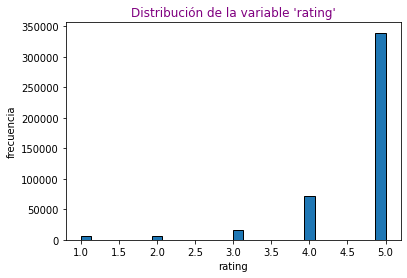

In [91]:
# seleccionamos la variable para crear un histograma
variable = coursera_rew["rating"]

# crea el histograma
plt.hist(variable, bins=30, edgecolor='black')

# agrega título y etiquetas de eje
plt.title("Distribución de la variable 'rating'", color='purple')
plt.xlabel("rating")
plt.ylabel("frecuencia")

# muestra el histograma
plt.show()


Del grafico vemos que la calificacion con mayor frecuencia es de 5, como era de esperarse ya que los cursos son ofrecidos por universidas e instituciones reconocidas a nivel mundial. Además, se observa que no hay outliers en la columa 'rating'. 

Pasamos la columna 'date_reviews' a formato datetime

In [92]:
coursera_rew['date_reviews'] = pd.to_datetime(coursera_rew['date_reviews'])

Finalmente exportamos nuestro dataframe en formato csv para futuro análisis en Power Bi.

In [93]:
coursera_rew.to_csv('coursera_reviews.csv', columns=['reviews','reviewers','date_reviews', 'rating', 'course_id'], index_label='course_id', index=False)

EDA para el dataframe 'edx'.

In [94]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

Limpieza de datos: Tratamos valores faltantes, duplicados y outliers.

In [95]:
edx.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [96]:
# Reemplazamos los valores nulos en la columna 'summary' con los valores de la columna 'description' y asi para las otras columnas que podamos.

edx["summary"].fillna(edx["course_description"], inplace=True)
edx["subtitles"].fillna(edx["language"], inplace=True)
edx["course_description"].fillna('summary', inplace=True)
edx['n_enrolled'].fillna(0, inplace=True)

#borramos los nulos
edx.dropna(subset=['summary'], inplace=True)
edx.dropna(subset=['instructors'], inplace=True)

Como la columna 'course_syllabus' no es necesaria para nuestro análisis y posee gran cantidad de nulos la borramos

In [97]:
edx.drop('course_syllabus', axis=1, inplace=True)

Veamos valores duplicados en la columna 'title'

In [98]:
edx['title'].value_counts()

Introduction to Probability                  2
Marketing Management                         2
Introduction to Marketing                    2
How to Learn Online                          1
Epidemics II                                 1
                                            ..
The Ancient Greek Hero                       1
Agile Leadership Principles and Practices    1
How to Code: Simple Data                     1
Cybersecurity and Privacy in the IoT         1
MathTrackX: Special Functions                1
Name: title, Length: 943, dtype: int64

Veamos si esos 3 titulos son repetidos

In [99]:
edx[edx['title']=='Introduction to Probability']

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_url
59,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,https://www.edx.org/course/introduction-to-pro...
95,Introduction to Probability,"Learn probability, an essential language and s...","97,291",Self-paced on your time,Harvard University,Joseph Blitzstein,Intermediate,Data Analysis & Statistics,English,English,5–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $99 USD,Probability and statistics help to bring logic...,https://www.edx.org/course/introduction-to-pro...


In [100]:
#borramos el titulo repetido
edx.drop(59, axis=0, inplace=True)

In [101]:
edx[edx['title']=='Marketing Management']

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_url
159,Marketing Management,Learn how to effectively apply marketing manag...,"80,010",Self-paced on your time,Indian Institute of Management Bangalore,Ashis Mishra,Intermediate,Business & Management,English,"English, हिन्दी",2–4 hours per week,9 Weeks,FREE-Add a Verified Certificate for $150 USD,According to world-renowned management consult...,https://www.edx.org/course/marketing-management
388,Marketing Management,Learn key marketing strategies and tactics to ...,"43,415",Instructor-led on a course schedule,"The University of Maryland, College Park-Unive...",Judy Frels-David Godes-P.K. Kannan-Mary Beth F...,Advanced,Business & Management,English,English,8–10 hours per week,7 Weeks,FREE-Add a Verified Certificate for $214 USD,"Mark Cuban, owner of the Dallas Mavericks, put...",https://www.edx.org/course/marketing-management-2


In [102]:
edx[edx['title']=='Introduction to Marketing']

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_url
161,Introduction to Marketing,"Learn the fundamentals to marketing, including...","169,126",Self-paced on your time,University of British Columbia,Darren Dahl-Paul Cubbon,Introductory,Business & Management,English,English,3–5 hours per week,6 Weeks,FREE-Add a Verified Certificate for $150 USD,Marketing is a crucial function in all busines...,https://www.edx.org/course/introduction-to-mar...
561,Introduction to Marketing,An introduction to the role of marketing in a ...,0,Self-paced on your time,The University of Edinburgh,Ewelina Lacka-Malcolm Kirkup-Asanka de Silva-A...,Introductory,Business & Management,English,English,2–3 hours per week,6 Weeks,FREE-Add a Verified Certificate for $149 USD,Do you want to learn how successful businesses...,https://www.edx.org/course/introduction-to-mar...


Los dos últimos dos titulos son diferentes, por tanto no los borramos.

Para la columna 'price' sacamos solo el valor numérico para despues calcular la columna ventas.

In [103]:
#creamos una funcion que extrae solo el número de la columna 'price'

import re

def extract_value(text):
    match = re.search(r'\$(\d+)', text)
    if match:
        return int(match.group(1))
    else:
        return None


In [104]:
edx['price'] = edx['price'].apply(extract_value)

Finalmente exportamos nuestro dataframe 'edx' en formato csv para un futuro analisis en Power Bi.

In [105]:
edx.to_csv('edx.csv',columns= ['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_url', ],header=True, index=False)

EDA para el dataframe 'udemy'.

In [106]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


veamos si hay registros duplicados con la columna 'course_id'

In [107]:
udemy['course_id'].value_counts()

1084454    2
28295      2
185526     2
1157298    2
837322     2
          ..
669174     1
1185898    1
1177156    1
177614     1
297602     1
Name: course_id, Length: 3672, dtype: int64

borramos los duplicados

In [108]:
udemy.drop_duplicates(subset=['course_id'], keep='first',inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

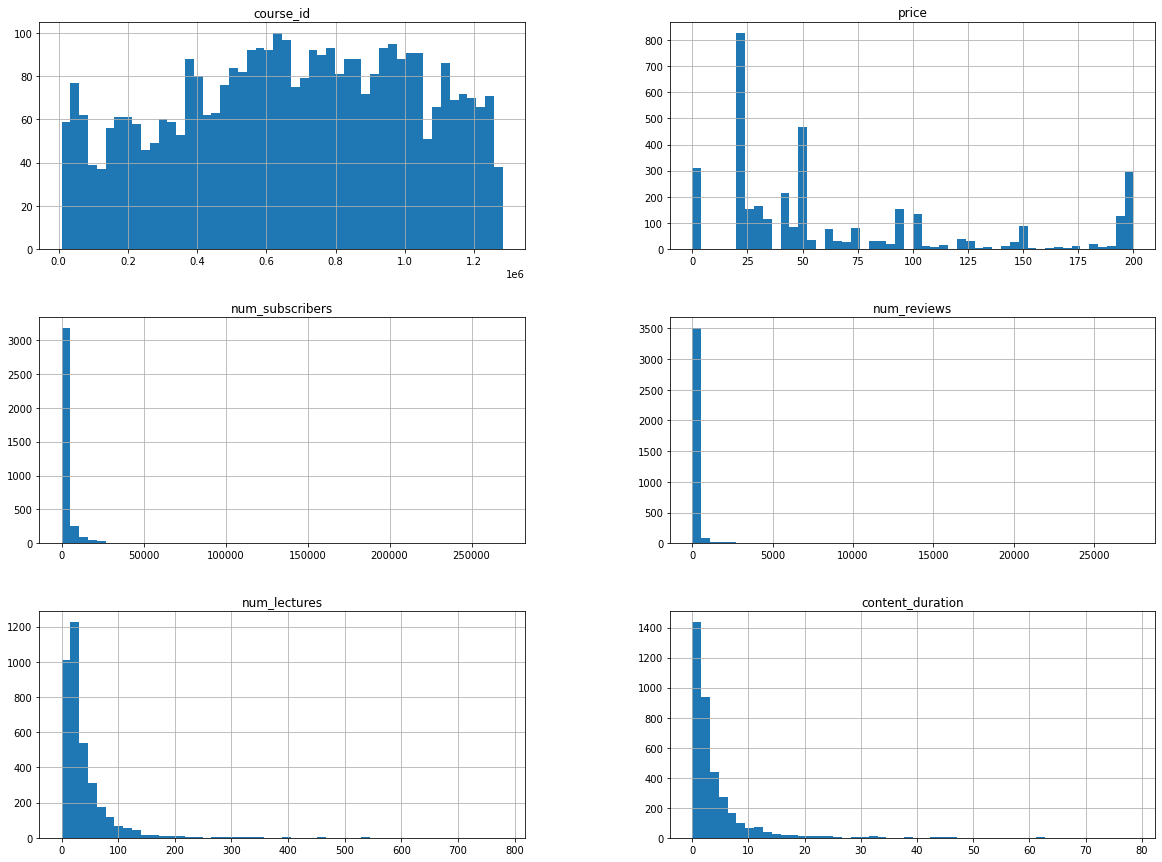

In [109]:
#graficamos histogramas para los datos numericos

import matplotlib.pyplot as plt
udemy.hist(bins = 50, figsize = (20,15))
plt.show

* Las columnas 'price' y 'content_duration' no presentan outliers y tienen tendencia a ser segadas a la izquierda
* Las distrubuciones de las columnas 'num_lectures', 'num_subscribers' y 'num_reviews' presentan distribuciones sesgadas a la izquierda y además se detectan valores inusuales en dichas columnas. 

Veamos estas distribuciones más a detalle.

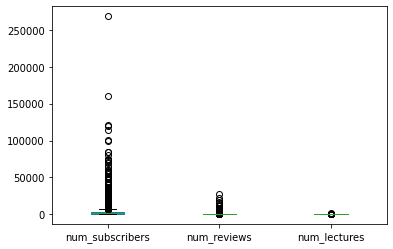

In [110]:
udemy.boxplot(column=['num_subscribers', 'num_reviews','num_lectures'], grid=False)

plt.show()


<AxesSubplot: >

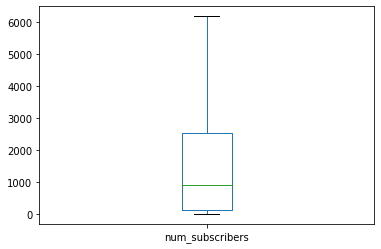

In [111]:
# Distribucion de la columna 'num_subscribers' sin outliers

udemy.boxplot(column=['num_subscribers'], grid=False, showfliers= False)


<AxesSubplot: >

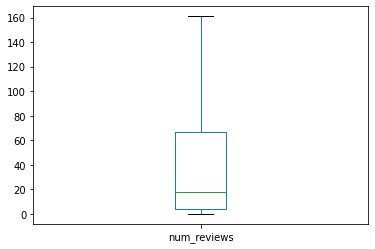

In [112]:
# Distribucion de la columna 'num_reviews' sin outliers

udemy.boxplot(column=['num_reviews'], grid=False, showfliers= False)


<AxesSubplot: >

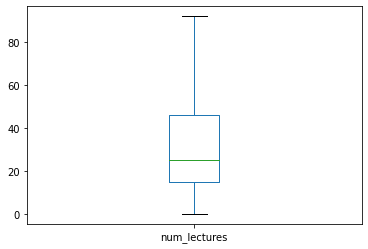

In [113]:
# Distribucion de la columna 'num_lectures' sin outliers

udemy.boxplot(column=['num_lectures'], grid=False, showfliers= False)


Observando los diagramas de caja con outliers y sin outliers encontramos que hay gran número de outliers en las tres distribuciones, sin embargo, considerando el contexto del problema, estos valores se pueden dar sin ningún problema, ya que por ejemplo para la columna 'num_subscribers' pueden haber cursos muy buenos y así tener un gran número de subscriptores. Por lo tanto, no vamos a borrar los outliers presentes en estas tres columnas.

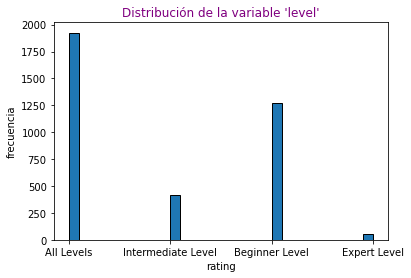

In [114]:
# seleccionamos la variable para crear un histograma
variable = udemy["level"]

# crea el histograma
plt.hist(variable, bins=30, edgecolor='black')

# agrega título y etiquetas de eje
plt.title("Distribución de la variable 'level'", color='purple')
plt.xlabel("rating")
plt.ylabel("frecuencia")

# muestra el histograma
plt.show()

Observamos que no presenta outliers y se distribuye bien ya que los cursos 'Expert nivel' son pocos mientras que los cursos de dificultad básica son de mayor frecuencia en dichas plataformas.

Usamos la funcion 'detect_language' para crear la columna 'language' 

In [115]:
udemy['language'] = udemy['course_title'].apply(detect_language)

Finalmente exportamos nuestro dataframe 'edx' en formato csv para un futuro analisis en Power Bi.

In [116]:
udemy.to_csv('udemy.csv',columns= ['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject','language'], index_label= 'course_id', index=False)

Hasta aquí llega nuestro EDA para los datasets que estamos trabajando. Ahora vamos a exportarlos a la herrramienta Power Bi con el fin de realizar las consultas y dashboard requeridos por el cliente.